<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


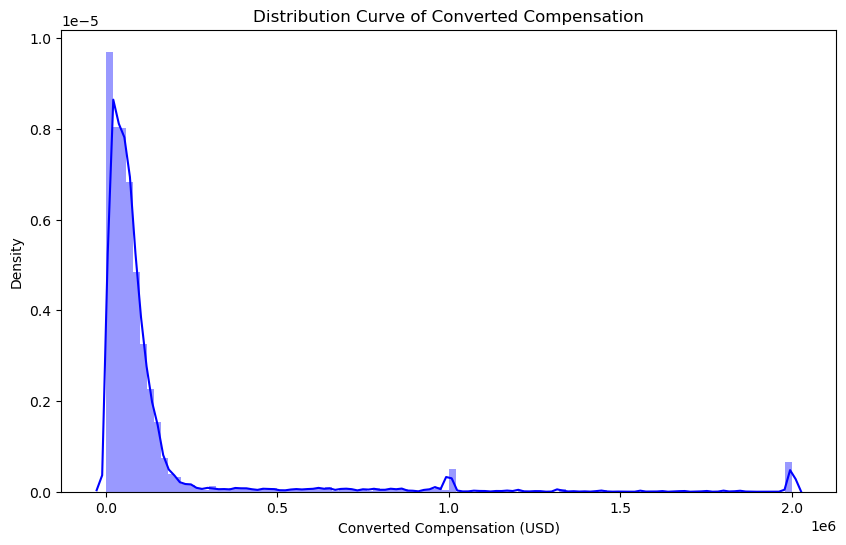

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (replace "data.csv" with the actual file name)
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
# Create the distribution curve for 'ConvertedComp'
plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedComp'], bins = 100, kde=True, color='blue')
plt.title('Distribution Curve of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


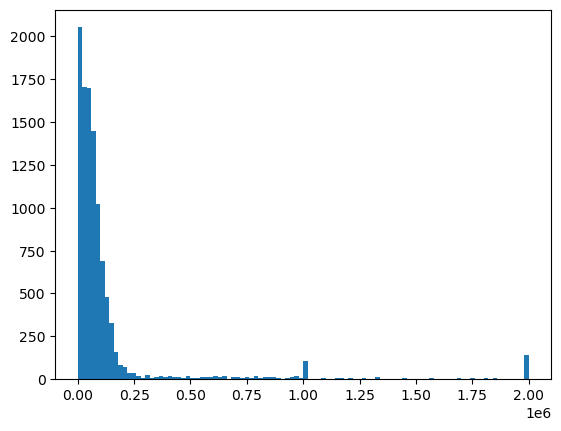

In [29]:
# your code goes here
plt.hist(df['ConvertedComp'],bins=100)
plt.show()

What is the median of the column `ConvertedComp`?


In [4]:
# your code goes here

conv_median = df['ConvertedComp'].median()
print("the median of the column `ConvertedComp` is ", conv_median)


the median of the column `ConvertedComp` is  57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
res_man = df[df['Gender']=='Man']
count_man = len(res_man)
print('there are ',count_man,'identified themselves only as a **Man**')


there are  10480 identified themselves only as a **Man**


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
res_woman = df[df['Gender']=='Woman']
woman_median = res_woman['ConvertedComp'].median()
print('the  median ConvertedComp of responders identified themselves only as a **Woman** is $',woman_median)

the  median ConvertedComp of responders identified themselves only as a **Woman** is $ 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
age_sum = df['Age'].describe(percentiles=[0.25,0.5,0.75])
min_age = age_sum['min']
q1 = age_sum['25%']
med = age_sum['50%']
q3 = age_sum['75%']
mx = age_sum['max']
print('the five number summary for the column Age are as following:'
      '\n min age is ',min_age,
     '\n q1 is ',q1,
     '\n median is ',med,
     '\n q3 is ',q3,
     '\n max is ',mx)

the five number summary for the column Age are as following:
 min age is  16.0 
 q1 is  25.0 
 median is  29.0 
 q3 is  35.0 
 max is  99.0


Plot a histogram of the column `Age`.


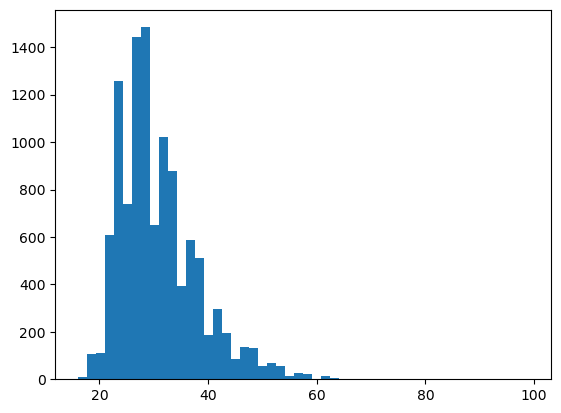

In [20]:
# your code goes here
plt.hist(df['Age'],bins=50)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


0        22.0
1        23.0
2        28.0
3        26.0
4        29.0
         ... 
11393    36.0
11394    25.0
11395    34.0
11396    25.0
11397    30.0
Name: Age, Length: 11398, dtype: float64


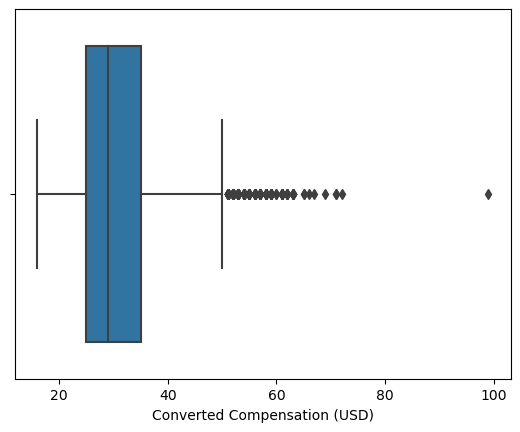

Number of outliers below Q1: 0


In [14]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
print(df['Age'])
sns.boxplot(x='Age',data=df)
plt.xlabel('Converted Compensation (USD)')
plt.show()

Q1 = df['Age'].quantile(0.25)
lower_whisker = Q1 - 1.5 * (Q1 - df['Age'].min())
outliers_below_Q1 = (df['Age'] < lower_whisker)
num_outliers_below_Q1 = outliers_below_Q1.sum()

print(f"Number of outliers below Q1: {num_outliers_below_Q1}")







Find out the Inter Quartile Range for the column `ConvertedComp`.


In [4]:
# your code goes here
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
quartile = q3-q1
print('the quartile range is  ',quartile)



the quartile range is   73132.0


Find out the upper and lower bounds.


In [5]:
# your code goes here
lower_bound = q1 - (1.5 * quartile)
upper_bound = q3 + (1.5 * quartile)
print(f"Lower Bound: ${lower_bound:.2f}")
print(f"Upper Bound: ${upper_bound:.2f}")


Lower Bound: $-82830.00
Upper Bound: $209698.00


Identify how many outliers are there in the `ConvertedComp` column.


In [6]:
# your code goes here
outliers = (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)

# Count the number of outliers
num_outliers = outliers.sum()

print(f"Number of outliers in the 'ConvertedComp' column: {num_outliers}")

Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [17]:
# your code goes here
no_outliers = df[(df['ConvertedComp']>= lower_bound) & (df['ConvertedComp']<= upper_bound)]

# print(f"Number of outliers in the 'ConvertedComp' column: {no_outliers['ConvertedComp'].mean()}")

Number of outliers in the 'ConvertedComp' column: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [10]:
# your code goes here
import pandas as pd

correlation_matrix = df.corr()

age_correlations = correlation_matrix['Age']

print("Correlation between Age and other numerical columns:")
print(age_correlations)



Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
